In [22]:
import matplotlib.pyplot as plt
import sscPhantom
import numpy as np
from sscRadon import radon
import matplotlib.pyplot as plt

## Define complex phantom

mario: (64, 64, 64) 524.3KB


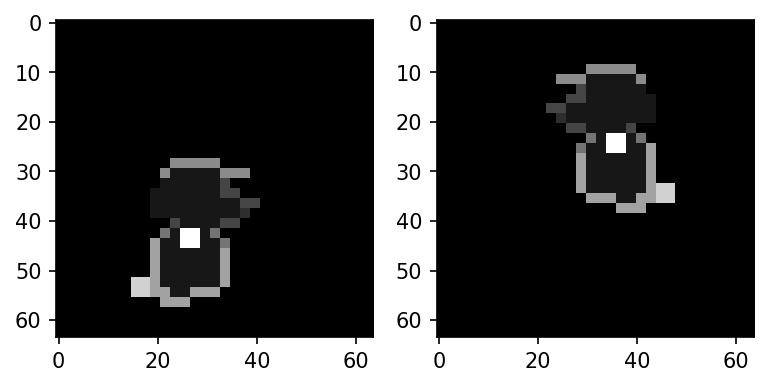

In [23]:
N = 64
Z=0.5
noise = False
unwrap = False

path_tomo = "/ibira/lnls/beamlines/caterete/apps/jupyter/00000000/proc/recons/phantom_complex/object_phantom_complex.npy"
path_phantom = "/ibira/lnls/beamlines/caterete/apps/jupyter/00000000/proc/recons/phantom_complex/phantom_complex.npy"

mario = sscPhantom.mario.createMario(shape=N, noise=noise, zoom=Z)
phase = mario/mario.max() 

if unwrap == True:
    phase = 20*phase
    gradient = np.ones_like(phase)
    values = np.linspace(0,1,phase.shape[0])*2*np.pi
    for i in range(phase.shape[0]):
        gradient[i,:,:] = gradient[i,:,:]*values[i]
        gradient[:,i,:] = gradient[:,i,:]*values[i]
    phase = phase + gradient 
    
phase = np.flip(phase,axis=1)
phase = np.roll(phase,5,axis=1)
phase = np.roll(phase,-10,axis=0)

magnitude = mario/mario.max() + 1
magnitude = np.roll(magnitude,-6,axis=1)
magnitude = np.roll(magnitude,9,axis=0)

phantom = magnitude*np.exp(1j*phase)

magnitude = np.abs(phantom)
phase = np.angle(phantom)

figure, ax = plt.subplots(1,2,dpi=150)
ax[0].imshow(magnitude[:,:,phantom.shape[0]//2],cmap='gray')
ax[1].imshow(phase[:,:,phantom.shape[0]//2],cmap='gray')

np.save(path_phantom,phantom)

## Get phantom projections

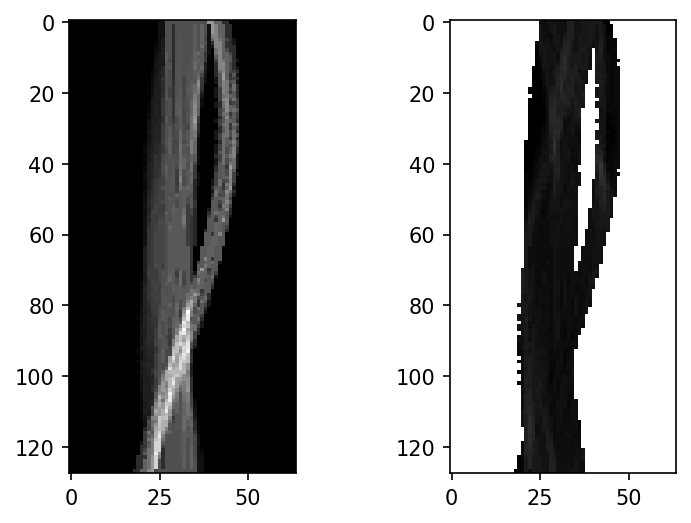

In [26]:
gpus    = [5]
nangles = 2*N
magnitude = np.abs(phantom) - 1
phase = np.angle(phantom) - 1
tomogram_magnitude = np.swapaxes( radon.radon_gpu_block( magnitude, nangles, gpus, blocksize=10 ), 0, 1)
tomogram_phase     = np.swapaxes( radon.radon_gpu_block( phase, nangles, gpus, blocksize=10 ), 0, 1)

# noise = np.random.normal(0, phantom.max()/100, tomogram_magnitude.shape)
# tomogram_magnitude = tomogram_magnitude + 1 * noise

# noise = np.random.normal(0, phantom.max()/100, tomogram_phase.shape)
# tomogram_phase = tomogram_phase + 1 * noise

tomogram = tomogram_magnitude*np.exp(1j*tomogram_phase)

figure, ax = plt.subplots(1,2,dpi=150)
ax[0].imshow(np.abs(tomogram[:,tomogram.shape[1]//2,:]),cmap='gray')
ax[1].imshow(np.angle(tomogram[:,tomogram.shape[1]//2,:]),cmap='gray')

# np.save(path_tomo,tomogram)